#MP3-Car_clus

##EDA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv(r'/content/cars_clus.csv')

In [ ]:
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0
1,Acura,TL,39.384,19.875,0,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0
2,Acura,RL,8.588,29.725,0,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0
3,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0
4,Audi,A6,18.780,23.555,0,33.95,2.8,200,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   manufact   117 non-null    object 
 1   model      117 non-null    object 
 2   sales      117 non-null    float64
 3   resale     117 non-null    float64
 4   type       117 non-null    int64  
 5   price      117 non-null    float64
 6   engine_s   117 non-null    float64
 7   horsepow   117 non-null    int64  
 8   wheelbas   117 non-null    float64
 9   width      117 non-null    float64
 10  length     117 non-null    float64
 11  curb_wgt   117 non-null    float64
 12  fuel_cap   117 non-null    float64
 13  mpg        117 non-null    float64
 14  lnsales    117 non-null    float64
 15  partition  117 non-null    int64  
dtypes: float64(11), int64(3), object(2)
memory usage: 14.8+ KB


In [ ]:
df.isnull().sum()

,0
manufact,0
model,0
sales,0
resale,0
type,0
price,0
engine_s,0
horsepow,0
wheelbas,0
width,0


In [ ]:
df.shape

(117, 16)

In [ ]:
df.duplicated().sum()

np.int64(0)

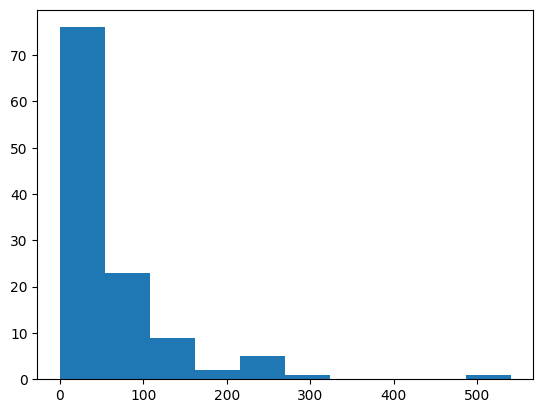

In [ ]:
plt.hist(df["sales"])
plt.show()

Correleation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   manufact   117 non-null    object 
 1   model      117 non-null    object 
 2   sales      117 non-null    float64
 3   resale     117 non-null    float64
 4   type       117 non-null    int64  
 5   price      117 non-null    float64
 6   engine_s   117 non-null    float64
 7   horsepow   117 non-null    int64  
 8   wheelbas   117 non-null    float64
 9   width      117 non-null    float64
 10  length     117 non-null    float64
 11  curb_wgt   117 non-null    float64
 12  fuel_cap   117 non-null    float64
 13  mpg        117 non-null    float64
 14  lnsales    117 non-null    float64
 15  partition  117 non-null    int64  
dtypes: float64(11), int64(3), object(2)
memory usage: 14.8+ KB


In [ ]:
# Converting all the nominal datas to numerical values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['manufact'] = le.fit_transform(df['manufact'])
df['model']=le.fit_transform(df['model'])


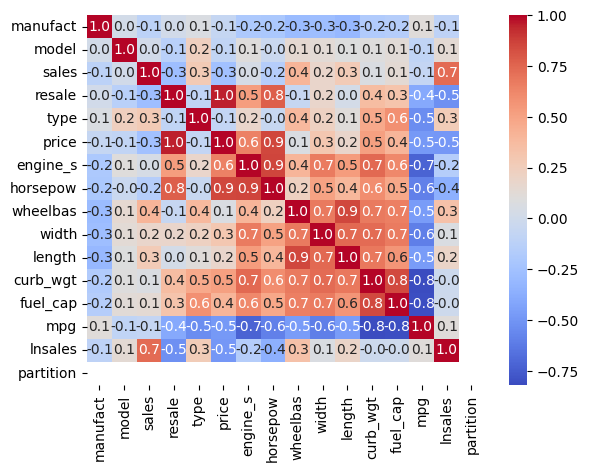

In [ ]:
# Correlation matrix
corr_matrix = df.corr()

# Heatmap
sns.heatmap(corr_matrix,annot=True, fmt='0.01f', cmap='coolwarm')
plt.show()

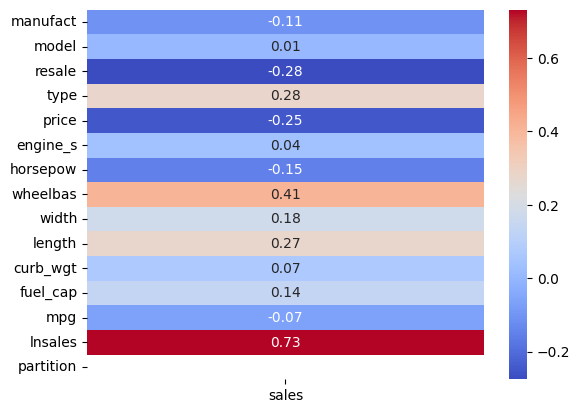

In [ ]:

sales_corr = df.corr()['sales']

sales_corr = sales_corr.drop('sales')

#heatmap
sns.heatmap(sales_corr.to_frame(), annot=True, fmt='.2f', cmap='coolwarm',cbar=True, annot_kws={'size': 10})
plt.show()

In [ ]:
df.drop(["manufact","partition","mpg","curb_wgt","engine_s","model","fuel_cap","horsepow","width"],axis=1,inplace=True)

<Axes: >

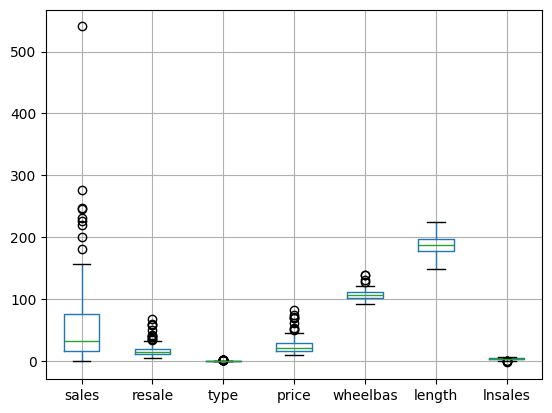

In [ ]:
df.boxplot()

In [ ]:
df.shape

(117, 7)

In [ ]:
#remove outliers
def remove_outliers_iqr(df, exclude_column):
    for col in df.columns:

        if col == exclude_column:
            continue
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_cleaned = remove_outliers_iqr(df, exclude_column='sales')
df=df_cleaned

In [ ]:
df.shape

(96, 7)

In [ ]:
df.columns

Index(['sales', 'resale', 'type', 'price', 'wheelbas', 'length', 'lnsales'], dtype='object')

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

features=['resale','type', 'price', 'wheelbas', 'length', 'lnsales']

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df[features])
scaled_df = pd.DataFrame(scaled_data, columns=features)

prediction

In [ ]:
df.head()

,sales,resale,type,price,wheelbas,length,lnsales
0,16.919,16.360,0,21.50,101.2,172.4,2.828
1,39.384,19.875,0,28.40,108.1,192.9,3.673
3,20.397,22.255,0,23.99,102.6,178.0,3.015
4,18.780,23.555,0,33.95,108.7,192.0,2.933
6,9.231,28.675,0,33.40,107.3,176.0,2.223


In [ ]:
from sklearn.linear_model import LinearRegression

X=df[['resale','type', 'price', 'wheelbas', 'length', 'lnsales']]
y=df['sales']

model=LinearRegression()
model.fit(X,y)

predicted_class=model.predict([[23.555,	0	,33.95, 108.7	,192.0 ,2.933]])
print(predicted_class)

[23.47492752]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
model= LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.7104564841264334

### Decision tree

In [ ]:
target=df["sales"]
target.head()

,sales
0,16.919
1,39.384
3,20.397
4,18.780
6,9.231


In [1]:
inputs = df[['resale', 'type', 'price', 'wheelbas', 'length', 'lnsales']]
inputs.head()

NameError: name 'df' is not defined

In [ ]:
df.columns

Index(['sales', 'resale', 'type', 'price', 'wheelbas', 'length', 'lnsales'], dtype='object')

In [ ]:
#for Regression "target" dont do label encoding for inputs

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#la_df=LabelEncoder()
#res_l=la_df.fit_transform(inputs['resale'])
#typ_l=la_df.fit_transform(inputs['type'])
#pri_l=la_df.fit_transform(inputs['price'])
#whe_l=la_df.fit_transform(inputs['wheelbas'])
#len_l=la_df.fit_transform(inputs['length'])
#ins_l=la_df.fit_transform(inputs['lnsales'])


In [ ]:
#inputs['sales']=res_l
#inputs['type']=typ_l
#inputs['price']=pri_l
#inputs['wheelbas']=whe_l
#inputs['length']=len_l
#inputs['lnsales']=ins_l

In [ ]:
from sklearn import tree
model=tree.DecisionTreeRegressor()
model.fit(inputs,target)
model.score(inputs,target)

1.0

In [ ]:
df.head()

,sales,resale,type,price,wheelbas,length,lnsales
0,16.919,16.360,0,21.50,101.2,172.4,2.828
1,39.384,19.875,0,28.40,108.1,192.9,3.673
3,20.397,22.255,0,23.99,102.6,178.0,3.015
4,18.780,23.555,0,33.95,108.7,192.0,2.933
6,9.231,28.675,0,33.40,107.3,176.0,2.223


In [ ]:
model.predict([[23.555, 0	,33.95, 108.7	,192.0 ,2.933]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([18.78])

SVM

In [ ]:
y=df['sales']
x=df.drop(["sales"],axis="columns")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [ ]:
model=SVR()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

-0.10777381121939955

In [ ]:
model.predict(xtest)

array([39.41020691, 39.54516663, 39.63586998, 39.53567445, 39.27045527,
       39.51624886, 39.53386781, 39.23236549, 39.61071389, 39.56675975,
       39.33685854, 39.28697452, 39.33820724, 39.48626155, 39.51796767,
       39.57495827, 39.51501093, 39.59402199, 39.18610893, 39.55923363,
       39.44755017, 39.42998972, 39.41143261, 39.35487949])

In [ ]:
ytest.head()

,sales
15,145.519
89,24.361
26,32.306
39,35.068
11,83.257


In [ ]:
#linear kernal
svclassifier = SVR(kernel="linear")
svclassifier.fit(xtrain, ytrain)
svclassifier.score(xtest, ytest)

0.542569987589189

In [ ]:
#polynomial kernal
svclassifier_2 = SVR(kernel='poly', degree=8)
svclassifier_2.fit(xtrain, ytrain)
svclassifier_2.score(xtest, ytest)

-0.06237659526036676

In [ ]:
#Gaussian Kernel
Gau_fier = SVR(kernel ='rbf')
Gau_fier.fit(xtrain, ytrain)
Gau_fier.score(xtest, ytest)


-0.10777381121939955

In [ ]:
#Sigmoid Kernel
sig_fier = SVR(kernel ='sigmoid')
sig_fier.fit(xtrain, ytrain)
sig_fier.score(xtest, ytest)

-0.10845797217086961

Random Forest

In [ ]:
y=df['sales']
x=df.drop(["sales"],axis="columns")

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.996108790269535

In [ ]:
model.predict(xtest.head())

array([146.48665,  24.22483,  32.33698,  35.47403,  83.06639])

In [ ]:
ytest.head()

,sales
15,145.519
89,24.361
26,32.306
39,35.068
11,83.257


In [ ]:
#confusion matrix dont work for regression

In [ ]:
y_pred=model.predict(xtest)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(ytest, y_pred)
mse = mean_squared_error(ytest, y_pred)


In [ ]:
print(mae)
print(mse)

1.2798066666666652
6.0997985779249495
